# Case study on Pre-processing


## Do the following on titanic dataset.

### 1. Load the dataset into python environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Make ‘PassengerId’ as the index column

In [3]:
data.set_index("PassengerId", inplace = True)

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.shape

(891, 11)

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

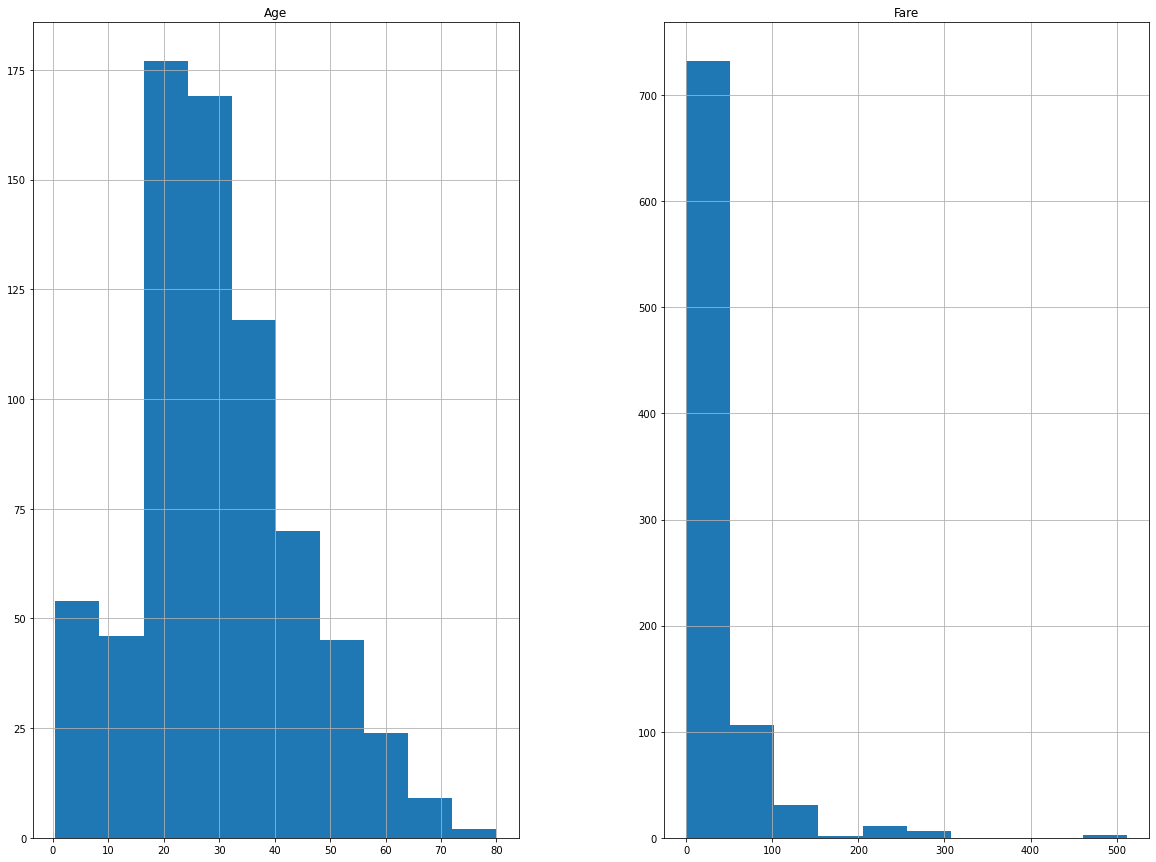

In [8]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 4. Fill in all the missing values present in all the columns in the dataset

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin'].fillna("Not Selected", inplace=True)
data['Embarked'].fillna("Not Specified", inplace=True)

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

#### (1)Outliers handling on column 'Age'

{'whiskers': [<matplotlib.lines.Line2D at 0x262841f5ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x262842031c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x262841f5730>],
 'medians': [<matplotlib.lines.Line2D at 0x26284203880>],
 'fliers': [<matplotlib.lines.Line2D at 0x26284203be0>],
 'means': []}

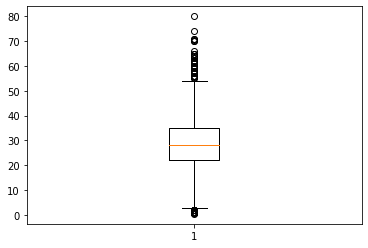

In [13]:
plt.boxplot(data['Age'])

In [14]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [15]:
data['Age'].median()

28.0

In [16]:
IQR=Q3-Q1
IQR

13.0

In [17]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print("Lower limit of Age is",low_lim )
print("Upper limit of Age is", up_lim)

Lower limit of Age is 2.5
Upper limit of Age is 54.5


In [18]:
outlier=[]
for x in data['Age']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [19]:
print("outlier is",outlier)

outlier is [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [20]:
ind1=data['Age']<low_lim
data.loc[ind1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [21]:
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [22]:
data.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832,12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [23]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Selected,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Selected,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Selected,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Not Selected,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Not Selected,S


{'whiskers': [<matplotlib.lines.Line2D at 0x262842b3850>,
 'caps': [<matplotlib.lines.Line2D at 0x262842b3f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x262842b3520>],
 'medians': [<matplotlib.lines.Line2D at 0x262842c0640>],
 'fliers': [<matplotlib.lines.Line2D at 0x262842c09a0>],
 'means': []}

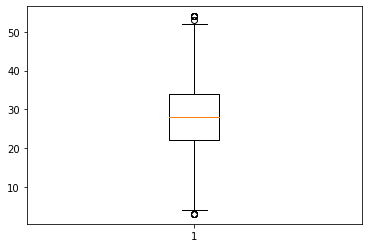

In [24]:
plt.boxplot(data['Age'])

#### (2)Outliers handling on column 'Fare'

{'whiskers': [<matplotlib.lines.Line2D at 0x2628430c970>,
 'caps': [<matplotlib.lines.Line2D at 0x2628431a0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2628430c610>],
 'medians': [<matplotlib.lines.Line2D at 0x2628431a760>],
 'fliers': [<matplotlib.lines.Line2D at 0x2628431aac0>],
 'means': []}

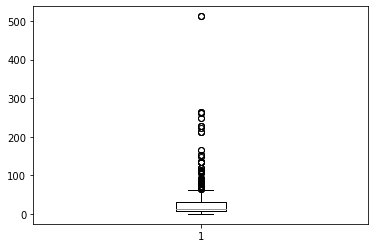

In [25]:
plt.boxplot(data['Fare'])

In [26]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.4167
30.0708


In [27]:
data['Fare'].median()

13.4167

In [28]:
IQR=Q3-Q1
IQR

22.174999999999997

In [29]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print("Lower limit of Fare is",low_lim )
print("Upper limit of Fare is", up_lim)

Lower limit of Fare is -25.366699999999994
Upper limit of Fare is 63.333299999999994


In [30]:
outlier=[]
for x in data['Fare']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [31]:
print("outlier is",outlier)

outlier is [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]


In [32]:
ind1=data['Fare']>up_lim
d2=data.loc[ind1].index


In [33]:
print(d2) 

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)


In [34]:
ind1=data['Fare']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64', name='PassengerId')

In [35]:
data.drop([ 2, 28, 32, 35, 53, 62, 63, 73, 89, 103, 119, 121, 125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 300, 307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 760, 764, 766, 780, 790, 793, 803, 821, 836, 847, 850, 857, 864],inplace=True)

In [36]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Selected,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Selected,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Selected,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Not Selected,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Not Selected,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Not Selected,S


{'whiskers': [<matplotlib.lines.Line2D at 0x26284371e80>,
 'caps': [<matplotlib.lines.Line2D at 0x26284380580>,
 'boxes': [<matplotlib.lines.Line2D at 0x26284371b20>],
 'medians': [<matplotlib.lines.Line2D at 0x26284380c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x26284380fd0>],
 'means': []}

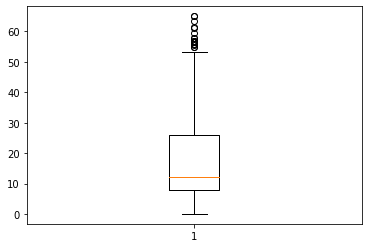

In [37]:
plt.boxplot(data['Fare'])

#### (3)Outliers handling on column 'Sibsp'

{'whiskers': [<matplotlib.lines.Line2D at 0x262843d0a60>,
 'caps': [<matplotlib.lines.Line2D at 0x262843e0190>,
 'boxes': [<matplotlib.lines.Line2D at 0x262843d0700>],
 'medians': [<matplotlib.lines.Line2D at 0x262843e0850>],
 'fliers': [<matplotlib.lines.Line2D at 0x262843e0bb0>],
 'means': []}

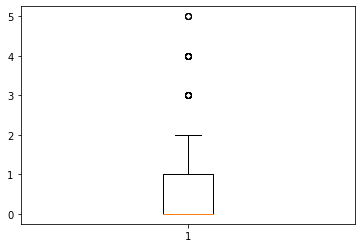

In [38]:
plt.boxplot(data['SibSp'])

In [39]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [40]:
data['SibSp'].median()

0.0

In [41]:
IQR=Q3-Q1
IQR

1.0

In [42]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print("Lower limit of SibSp is",low_lim )
print("Upper limit of SibSp is", up_lim)

Lower limit of SibSp is -1.5
Upper limit of SibSp is 2.5


In [43]:
outlier=[]
for x in data['SibSp']:
    if ((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [44]:
print("outlier is",outlier)

outlier is [3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 4, 3, 4]


In [45]:
ind1=data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [46]:
data.drop([25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],inplace=True)

In [47]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Selected,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Selected,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Selected,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Not Selected,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Not Selected,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Not Selected,S


{'whiskers': [<matplotlib.lines.Line2D at 0x26284434c10>,
 'caps': [<matplotlib.lines.Line2D at 0x26284442340>,
 'boxes': [<matplotlib.lines.Line2D at 0x262844348b0>],
 'medians': [<matplotlib.lines.Line2D at 0x26284442a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x26284442d60>],
 'means': []}

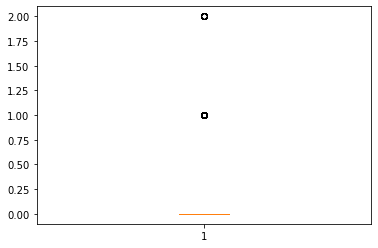

In [48]:
plt.boxplot(data['SibSp'])

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [49]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
del data['Name']

In [58]:
del data['Sex']

In [59]:
del data['Ticket']

In [60]:
del data['Cabin']

In [61]:
del data['Embarked']

In [62]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [63]:
y=data['Survived']
X=data.drop('Survived',axis=1)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [65]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print(y_test)

PassengerId
501    0
862    0
345    0
442    0
421    0
      ..
467    0
283    0
817    0
515    0
224    0
Name: Survived, Length: 173, dtype: int64


In [66]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,692.000000,692.000000,692.000000,692.000000,692.000000
mean,2.489884,28.723988,0.274566,0.276012,16.838565
std,0.724723,9.556844,0.501564,0.759200,13.437232
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,24.037500
max,3.000000,54.000000,2.000000,6.000000,65.000000


In [67]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [68]:
X=min_max.fit_transform(X)

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE is: 0.19478933919477825
R squared value is : 0.14668469953739505
